In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
int = pd.read_csv('/content/drive/MyDrive/Stock Price/data/outlier_int.csv')
same = pd.read_csv('/content/drive/MyDrive/Stock Price/data/outlier_same.csv')

# PCA - Same Version

Explained variance ratio: [0.95801503 0.02193042]
Cumulative explained variance: [0.95801503 0.97994545]


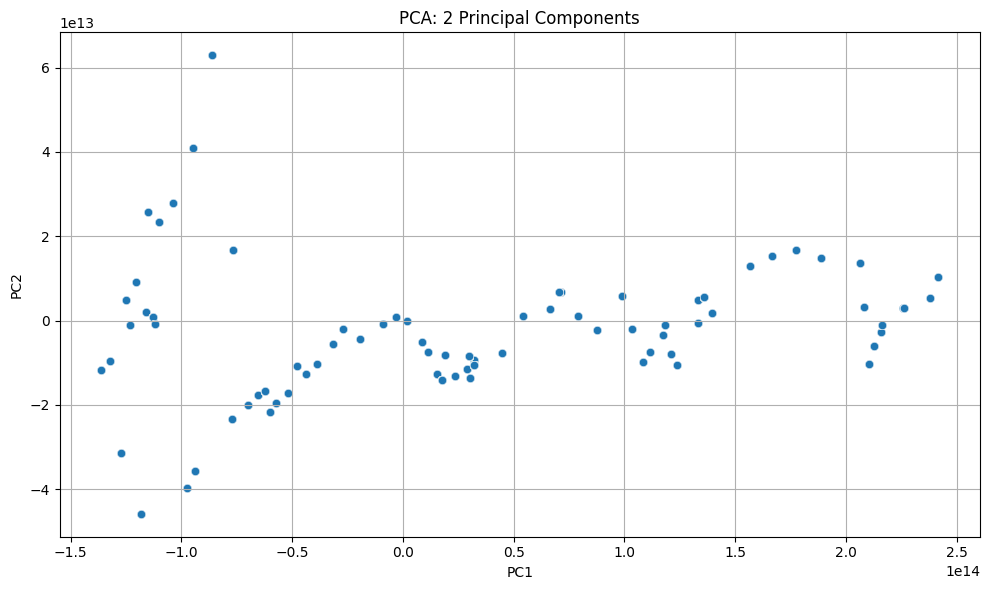

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# 데이터 준비 (same는 이미 전처리된 데이터로 가정)
df_pca = same.drop(columns=['Date'])

# PCA 모델 생성 (2개의 주성분으로 축소)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_pca)

# 결과를 DataFrame에 추가
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# 각 주성분이 설명하는 분산 비율
print("Explained variance ratio:", pca.explained_variance_ratio_)

# 누적 설명된 분산 비율
print("Cumulative explained variance:", np.cumsum(pca.explained_variance_ratio_))

# 주성분을 원본 데이터에 추가하고, Date 컬럼을 다시 결합
same_pca = same.copy()
same_pca['PC1'] = pca_df['PC1']
same_pca['PC2'] = pca_df['PC2']

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=same_pca, alpha=0.6)

# 그래프 꾸미기
plt.title('PCA: 2 Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.tight_layout()

# 그래프 출력
plt.show()


In [4]:
components_df = pd.DataFrame(pca.components_, columns=df_pca.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print(components_df)

             Open          High           Low         Close        Volume  \
PC1  1.892605e-10  1.907645e-10  1.875610e-10  1.892165e-10  5.054461e-08   
PC2  5.670111e-11  5.712560e-11  5.625127e-11  5.612714e-11  3.148461e-08   

           Change  Transaction  SE_Operating_Profit  SE_Net_Profit  \
PC1 -2.974748e-18     0.003477             0.005512       0.010567   
PC2 -3.186643e-17     0.002718             0.097305       0.089865   

     SE_Total_Equity  ...       KR_Base         KR_10           WTI  \
PC1         0.970222  ... -6.500101e-15 -9.909244e-15  4.967339e-14   
PC2        -0.063464  ...  2.201661e-14  1.003101e-14  2.591253e-13   

         Exchange     SOX_Close         Phone  KR_Unemployment  US_President  \
PC1  3.446684e-13  8.703133e-12  2.859163e-14    -9.939711e-16 -1.655809e-15   
PC2 -1.702792e-12  7.127367e-12 -3.804107e-14    -5.012286e-15  1.051593e-14   

     KR_President       Covid19  
PC1  7.022722e-16  1.238149e-15  
PC2 -6.404023e-15  2.179292e-15  


In [5]:
# PCA 결과의 컴포넌트 로딩 (이 부분은 pca.components_를 사용해 가져온 값으로 대체해야 함)
# 예시로 pca.components_의 값을 로딩한 상태로 처리
loadings = pca.components_

# PC1, PC2의 가중치를 Series로 변환
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=df_pca.columns)

# PC1과 PC2에 크게 영향을 미치는 특성 확인
top_features_pc1 = loadings_df['PC1'].abs().nlargest(10)  # PC1에서 가장 큰 영향을 미치는 상위 5개 특성
top_features_pc2 = loadings_df['PC2'].abs().nlargest(10)  # PC2에서 가장 큰 영향을 미치는 상위 5개 특성

print("Features that affect PC1 most:")
print(top_features_pc1)

print("\nFeatures that affect PC2 most:")
print(top_features_pc2)


Features that affect PC1 most:
SE_Total_Equity         9.702216e-01
SE_Total_Liabilities    2.403154e-01
SE_Revenue              2.764778e-02
SE_Net_Profit           1.056738e-02
SE_Operating_Profit     5.511633e-03
Transaction             3.476873e-03
Volume                  5.054461e-08
High                    1.907645e-10
Open                    1.892605e-10
Close                   1.892165e-10
Name: PC1, dtype: float64

Features that affect PC2 most:
SE_Revenue              9.795758e-01
SE_Total_Liabilities    1.373034e-01
SE_Operating_Profit     9.730521e-02
SE_Net_Profit           8.986467e-02
SE_Total_Equity         6.346447e-02
Transaction             2.718166e-03
Volume                  3.148461e-08
High                    5.712560e-11
Open                    5.670111e-11
Low                     5.625127e-11
Name: PC2, dtype: float64


# PCA - Interpolation Version

Explained variance ratio: [0.96571208 0.01818262]
Cumulative explained variance: [0.96571208 0.9838947 ]


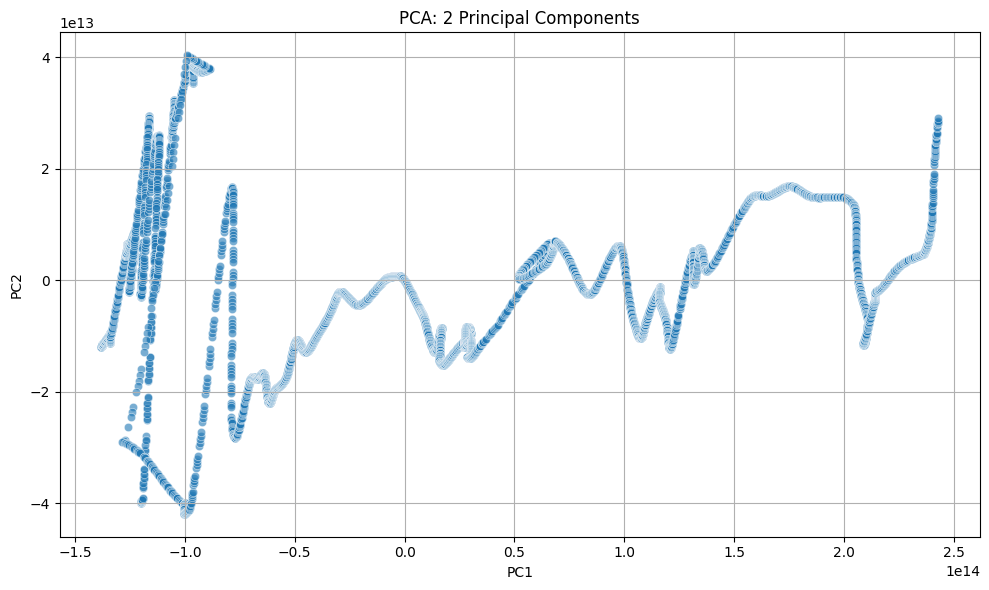

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# 데이터 준비 (int는 이미 전처리된 데이터로 가정)
df_pca = int.drop(columns=['Date'])

# PCA 모델 생성 (2개의 주성분으로 축소)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_pca)

# 결과를 DataFrame에 추가
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# 각 주성분이 설명하는 분산 비율
print("Explained variance ratio:", pca.explained_variance_ratio_)

# 누적 설명된 분산 비율
print("Cumulative explained variance:", np.cumsum(pca.explained_variance_ratio_))

# 주성분을 원본 데이터에 추가하고, Date 컬럼을 다시 결합
int_pca = int.copy()
int_pca['PC1'] = pca_df['PC1']
int_pca['PC2'] = pca_df['PC2']

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=int_pca, alpha=0.6)

# 그래프 꾸미기
plt.title('PCA: 2 Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.tight_layout()

# 그래프 출력
plt.show()


In [7]:
components_df = pd.DataFrame(pca.components_, columns=df_pca.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print(components_df)

             Open          High           Low         Close        Volume  \
PC1  1.881561e-10  1.896489e-10  1.864707e-10  1.881161e-10  4.889059e-08   
PC2  9.505402e-11  9.558948e-11  9.444907e-11  9.463765e-11  4.701330e-08   

           Change  Transaction  SE_Operating_Profit  SE_Net_Profit  \
PC1 -1.397158e-18     0.003362             0.010394       0.009987   
PC2 -1.569094e-17     0.003914             0.140211       0.102151   

     SE_Total_Equity  ...       KR_Base         KR_10           WTI  \
PC1         0.970137  ... -6.506866e-15 -9.855365e-15  5.070523e-14   
PC2        -0.067154  ...  2.432212e-14  9.432468e-15  2.609469e-13   

         Exchange     SOX_Close         Phone  KR_Unemployment  US_President  \
PC1  3.432352e-13  8.585361e-12  2.561565e-14    -1.009891e-15 -1.676442e-15   
PC2 -2.504310e-12  1.068161e-11 -3.726157e-14    -5.689390e-15  1.179693e-14   

     KR_President       Covid19  
PC1  6.971963e-16  1.237989e-15  
PC2 -9.459352e-15  2.946253e-15  


In [8]:
# PCA 결과의 컴포넌트 로딩 (이 부분은 pca.components_를 사용해 가져온 값으로 대체해야 함)
# 예시로 pca.components_의 값을 로딩한 상태로 처리
loadings = pca.components_

# PC1, PC2의 가중치를 Series로 변환
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=df_pca.columns)

# PC1과 PC2에 크게 영향을 미치는 특성 확인
top_features_pc1 = loadings_df['PC1'].abs().nlargest(10)  # PC1에서 가장 큰 영향을 미치는 상위 5개 특성
top_features_pc2 = loadings_df['PC2'].abs().nlargest(10)  # PC2에서 가장 큰 영향을 미치는 상위 5개 특성

print("Features that affect PC1 most:")
print(top_features_pc1)

print("\nFeatures that affect PC2 most:")
print(top_features_pc2)


Features that affect PC1 most:
SE_Total_Equity         9.701371e-01
SE_Total_Liabilities    2.405243e-01
SE_Revenue              2.762325e-02
SE_Operating_Profit     1.039382e-02
SE_Net_Profit           9.987036e-03
Transaction             3.361815e-03
Volume                  4.889059e-08
High                    1.896489e-10
Open                    1.881561e-10
Close                   1.881161e-10
Name: PC1, dtype: float64

Features that affect PC2 most:
SE_Revenue              9.711792e-01
SE_Total_Liabilities    1.489698e-01
SE_Operating_Profit     1.402114e-01
SE_Net_Profit           1.021509e-01
SE_Total_Equity         6.715407e-02
Transaction             3.914042e-03
Volume                  4.701330e-08
High                    9.558948e-11
Open                    9.505402e-11
Close                   9.463765e-11
Name: PC2, dtype: float64


# Correlation - Same

Correlation between Close and Others:
Open                       0.998410
High                       0.998541
Low                        0.998546
Volume                     0.763689
Change                    -0.005379
Transaction                0.791872
SE_Operating_Profit        0.259180
SE_Net_Profit              0.403015
SE_Total_Equity            0.954366
SE_Total_Liabilities       0.856802
SE_Revenue                 0.207470
SE_Foreign                 0.180807
US_Inflation               0.419107
KR_Inflation              -0.186369
CN_Inflation              -0.150302
US_GDP_Annual              0.235759
KR_GDP_Annual             -0.379236
CN_GDP_Annual             -0.566440
US_Economic_Growth_Rate    0.129990
KR_Economic_Growth_Rate   -0.230695
US_Base                    0.139355
US_10                     -0.482168
KR_Base                   -0.587456
KR_10                     -0.693615
WTI                        0.212318
Exchange                   0.299654
SOX_Close                 

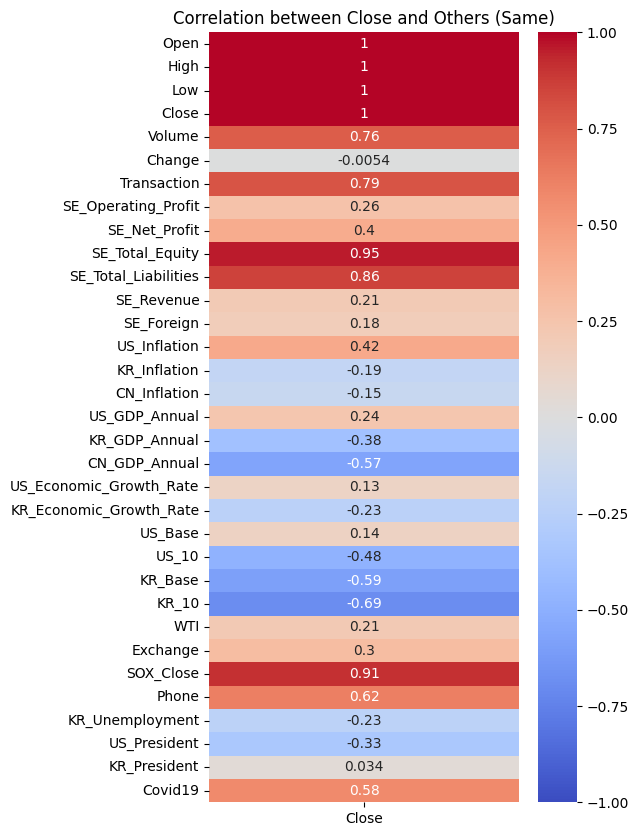

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# df_handled에서 'Date'를 제외한 모든 열들 간의 상관관계를 계산
correlation_matrix = same.drop(columns=['Date']).corr()

# 'Close'와 다른 특성들 간의 상관관계 추출
close_correlation = correlation_matrix['Close'].drop('Close')

# 상관관계 출력
print("Correlation between Close and Others:")
print(close_correlation)

# 상관관계를 시각화 (히트맵)
plt.figure(figsize=(5, 10))
sns.heatmap(correlation_matrix[['Close']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Close and Others (Same)')
plt.show()

# Correlation - Interpolation

Correlation between Close and Others:
Open                       0.998410
High                       0.998541
Low                        0.998546
Volume                     0.794755
Change                     0.001304
Transaction                0.823540
SE_Operating_Profit        0.307186
SE_Net_Profit              0.475842
SE_Total_Equity            0.956104
SE_Total_Liabilities       0.881360
SE_Revenue                 0.247626
SE_Foreign                 0.181242
US_Inflation               0.427278
KR_Inflation              -0.182654
CN_Inflation              -0.152364
US_GDP_Annual              0.268896
KR_GDP_Annual             -0.386170
CN_GDP_Annual             -0.629055
US_Economic_Growth_Rate    0.191543
KR_Economic_Growth_Rate   -0.315776
US_Base                    0.139747
US_10                     -0.482168
KR_Base                   -0.587456
KR_10                     -0.693615
WTI                        0.217703
Exchange                   0.306412
SOX_Close                 

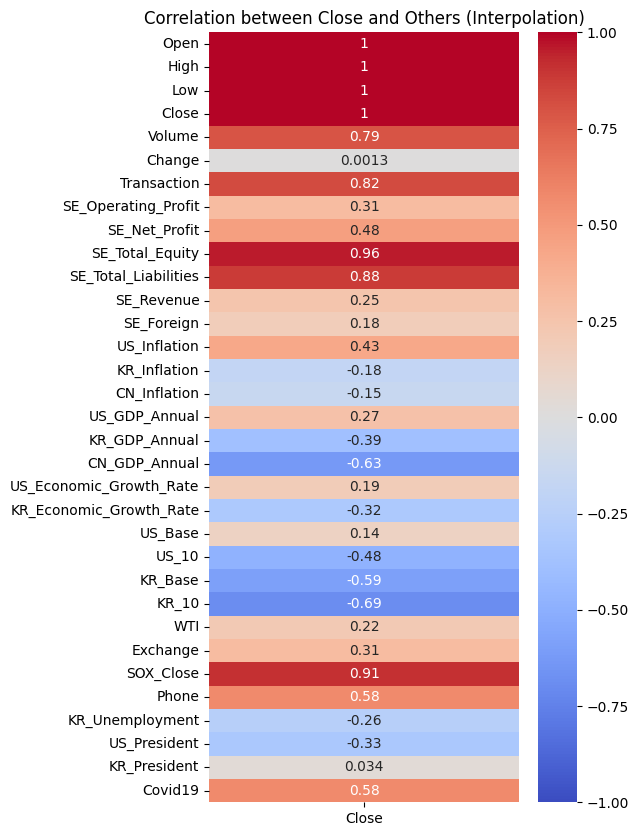

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# df_handled에서 'Date'를 제외한 모든 열들 간의 상관관계를 계산
correlation_matrix = int.drop(columns=['Date']).corr()

# 'Close'와 다른 특성들 간의 상관관계 추출
close_correlation = correlation_matrix['Close'].drop('Close')

# 상관관계 출력
print("Correlation between Close and Others:")
print(close_correlation)

# 상관관계를 시각화 (히트맵)
plt.figure(figsize=(5, 10))
sns.heatmap(correlation_matrix[['Close']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Close and Others (Interpolation)')
plt.show()